<a href="https://colab.research.google.com/github/terinkov/intelligent_systems/blob/main/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_CO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание на тему "линейная регрессия" (100 баллов)

***Дедлайн: 23:59 16 февраля***

### Небольшая математическая справка

Линейная регрессия — это метод, который моделирует зависимость между зависимой переменной $Y$ и одной или несколькими независимыми переменными  $X$.

Основная модель:
$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \varepsilon$$

Здесь:
- $\beta_0$ — свободный член (intercept),
- $\beta_j$ — коэффициенты регрессии,
- $\varepsilon$ — случайная ошибка.

Метод наименьших квадратов (МНК) минимизирует сумму квадратов отклонений:
$$RSS(\beta) = \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$

Решение в матричной форме:
$$\hat{\beta} = (X^TX)^{-1}X^TY$$

## Задача 1: Простая линейная регрессия (16 баллов)
Даны синтетические данные $X$ и $Y$, между которыми существует линейная зависимость:
$$Y = 2.5X + \varepsilon,$$
где $\varepsilon$ - случайный шум.

Задание:
1. (2 балла) Сгенерируйте 100 наблюдений для $X$ из равномерного распределения на интервале $[0,10]$.
2. (4 балла) Добавьте шум $\varepsilon \sim \mathcal{N}(0, \sigma^2)$, где $\sigma = 2$.
3. (6 баллов) Постройте модель линейной регрессии и визуализируйте результаты.
4. (4 балла) Вычислите среднеквадратичную ошибку (MSE).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

***Start your code***

In [ ]:
# Генерируем данные
np.random.seed(42)

# 1. Генерация данных
X = np.random.uniform(0, 10, 100).reshape(-1, 1)  # Преобразуем в столбец

# 2. Добавление случайного шума
sigma = 2
epsilon = np.random.normal(0, sigma, 100).reshape(-1, 1)

In [ ]:
# Обучаем модель

# 3. Создание зависимой переменной Y
Y = 2.5 * X + epsilon

# 4. Построение модели линейной регрессии
model = LinearRegression()
model.fit(X, Y)


LinearRegression()

In [ ]:
# Предсказания
Y_pred = model.predict(X)


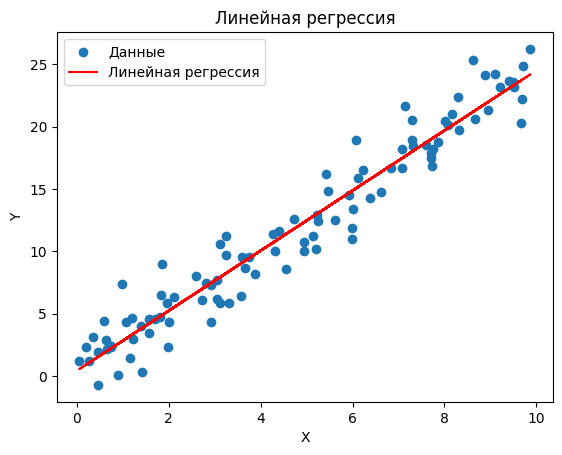

Среднеквадратичная ошибка (MSE): 3.23


In [ ]:

# Визуализация
from sklearn.metrics import mean_squared_error

plt.scatter(X, Y, label="Данные")
plt.plot(X, Y_pred, color="red", label="Линейная регрессия")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Линейная регрессия")
plt.legend()
plt.show()

#Ошибка сумма квадратов отклонений
mse = mean_squared_error(Y, Y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")


***End your code***

## Задача 2: Множественная линейная регрессия (16 баллов)
Используя датасет **California Housing**, выполните следующие задания:
1. (2 балла) Разделите данные на обучающую и тестовую выборки (80\% / 20\%).
2. (2 балла) Постройте модель линейной регрессии для предсказания стоимости жилья.
3. (4 балла) Вычислите среднеквадратичную ошибку (MSE) на тестовой выборке.
4. (8 баллов) Проанализируйте важность признаков модели.

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Загрузка набора данных
dataset = fetch_california_housing(as_frame=True)

# Получение заголовков (названий признаков)
feature_names = dataset.feature_names

# Вывод заголовков
for feature_name in feature_names:
    print(feature_name)

X, Y = dataset.data, dataset.target

MedInc
HouseAge
AveRooms
AveBedrms
Population
AveOccup
Latitude
Longitude


***Start your code***

In [ ]:
# Разделение на обучающую и тестовую выборки
# Разделение выборки в процентах выбрал 80%/20%

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Оценка качества модели
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")

Среднеквадратичная ошибка (MSE): 0.56


Важность признаков:
Longitude    -0.433708
Latitude     -0.419792
AveRooms     -0.123323
AveOccup     -0.003526
Population   -0.000002
HouseAge      0.009724
MedInc        0.448675
AveBedrms     0.783145
dtype: float64


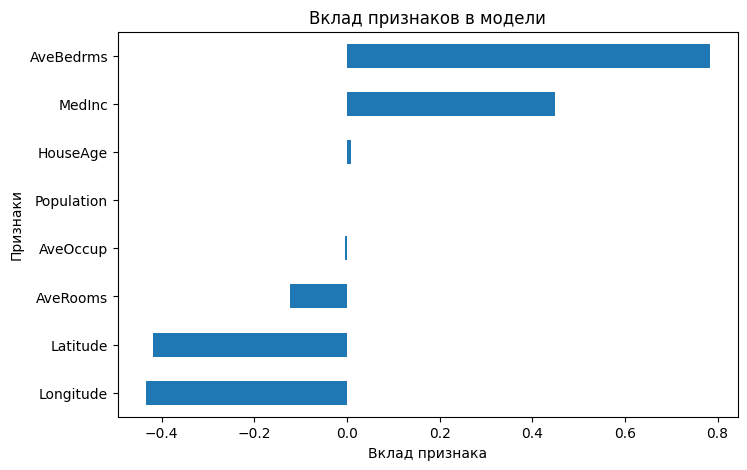

In [ ]:
# Анализ важности признаков
feature_importance = pd.Series(model.coef_, index=dataset.feature_names).sort_values(ascending=True)
print("Важность признаков:")
print(feature_importance)

plt.figure(figsize=(8, 5))
feature_importance.plot(kind='barh')
plt.title("Вклад признаков в модели")
plt.xlabel("Вклад признака")
plt.ylabel("Признаки")
plt.show()


## Роль параметра сдвига в линейной регрессии и проверке предположений МНК

Сдвиг (intercept, свободный член) в модели линейной регрессии необходимо для учета ненулевого среднего значения зависимой переменной $Y$, когда все предикторы равны нулю. В контексте проверки предположений метода наименьших квадратов (МНК) смещение играет важную роль, так как его отсутствие может привести к систематическим ошибкам и неверным выводам.

### Зачем нужен сдвиг?
**Первое:** для корректности модели. Если свободный член не включен, модель принудительно проходит через начало координат ($Y = 0$ при $X_i = 0$). Это может привести к неверной аппроксимации данных.
    
**Второе:** несмещённость оценок. При отсутствии свободного члена оценки коэффициентов могут быть смещёнными, что нарушает ключевое предположение МНК о несмещённости оценок: $E(\hat{\beta}) = \beta.$
    
**Третье:** геометрическая интерпретация: В матричной форме регрессии:$Y = X\beta + \varepsilon$, если $X$ не включает столбец из единиц (отвечающий за смещение), пространство предсказанных значений $Y$ может быть неправильно ориентировано.
    
**Четвертое:** корректная проверка гетероскедастичности. При анализе остатков важно учитывать возможные систематические отклонения, иначе ошибки модели могут быть неправильно интерпретированы.

### Практическая реализация
В Python добавление сдвига выполняется с помощью команды:

```python
import statsmodels.api as sm
X_const = sm.add_constant(X_train) # добавляет единичный столбец
ols_model = sm.OLS(Y_train, X_const).fit()
```
Этот шаг гарантирует, что свободный член включён в модель, что делает её более точной и корректной.

### Резюме
Добавление смещения — стандартная практика при построении линейных моделей, позволяющая избежать смещения оценок, корректно интерпретировать результаты и правильно проверять предположения МНК.

## Задача 3: Проверка предположений МНК (10 баллов)
Для модели из предыдущего задания проверьте предположения метода наименьших квадратов (нужна OLS-модель):
1. (4 балла) Вычислите коэффициент детерминации $R^2$.
2. (6 баллов) Постройте график остатков модели. Правильная форма распределения остатков похожа на квадрат или близкий ему прямоугольник. Если наблюдается какая-либо неправильная фигура, то нарушены требования постоянной вариации (гетероскедастичность).

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

***Start your code***

In [ ]:
# Добавляем единичный столбец для сдвига
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)


In [ ]:
X_train_sm

,const,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,1.0,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,1.0,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,1.0,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.0,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,1.0,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...,...
11284,1.0,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,1.0,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,1.0,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,1.0,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [ ]:
# Строим регрессионную модель
model = sm.OLS(y_train, X_train_sm).fit()
y_pred = model.predict(X_test_sm)

In [ ]:
# Коэффициент детерминации
r2 = r2_score(y_test, y_pred)
print(f"Коэффициент детерминации (R2): {r2:.2f}")

Коэффициент детерминации (R2): 0.58


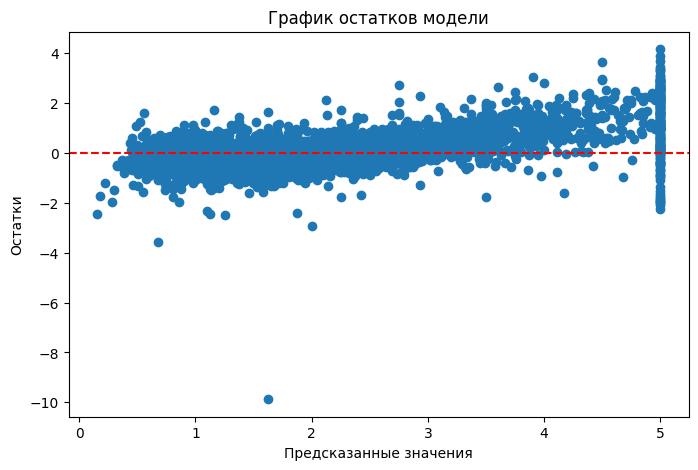

In [ ]:
# Построение графика остатков
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков модели")
plt.show()

***End your code***

## Задача 4: Лог-линейная регрессия (26 баллов)
Используя логарифмическое преобразование признаков, выполните следующие шаги:
1. (4 балла) Загрузите датасет **California Housing** и выберите переменные *MedInc, HouseAge, AveRooms, AveOccup* в качестве признаков.
2. (4 балла) Выполните логарифмическое преобразование: $X' = \log(1 + X)$ для каждого признака.
3. (8 балла) Постройте две модели линейной регрессии: одну с обычными признаками, вторую с лог-преобразованными.
4. (6 балла) Сравните качество моделей по MSE и $R^2$ на тестовой выборке.
5. (4 балла) Постройте графики остатков для обеих моделей.

### Комментарий:
1. Сравнение MSE и $R^2$ показывает, какая модель лучше предсказывает результаты.
2. Анализ графиков остатков позволяет выявить возможные проблемы гетероскедастичности. Правильная форма распределения остатков похожа на квадрат или близкий ему прямоугольник. Если наблюдается какая-либо неправильная фигура, то нарушены требования постоянной вариации (гетероскедастичность).
3. Лог-преобразование может улучшить качество предсказаний, если данные содержат асимметричные распределения.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.datasets import fetch_california_housing

***Start your code***

In [ ]:
# Загружаем датасет California Housing
# Загрузка набора данных
dataset = fetch_california_housing(as_frame=True)

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target

In [ ]:
# Выбираем признаки и целевую переменную
features = ["MedInc", "HouseAge", "AveRooms", "AveOccup"]
X = df[features].copy()

In [ ]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_log, X_test_log, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Логарифмическое преобразование признаков
X_train_log = np.log1p(X_train_log)
X_test_log = np.log1p(X_test_log)

In [ ]:
# Обучение моделей
# 6. Добавляем единичный столбец для сдвига
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
X_train_log_sm = sm.add_constant(X_train_log)
X_test_log_sm = sm.add_constant(X_test_log)

# 7. Строим две модели линейной регрессии
model = sm.OLS(y_train, X_train_sm).fit()
model_log = sm.OLS(y_train, X_train_log_sm).fit()

In [ ]:
# Предсказания
y_pred = model.predict(X_test_sm)
y_pred_log = model_log.predict(X_test_log_sm)

In [ ]:
# Оценка моделей
mse = mean_squared_error(y_test, y_pred)
mse_log = mean_squared_error(y_test, y_pred_log)
r2 = r2_score(y_test, y_pred)
r2_log = r2_score(y_test, y_pred_log)
print(f"MSE без лог-преобразования: {mse:.4f}, R2: {r2:.4f}")
print(f"MSE с лог-преобразованием: {mse_log:.4f}, R2: {r2_log:.4f}")

MSE без лог-преобразования: 0.6575, R2: 0.4983
MSE с лог-преобразованием: 0.6108, R2: 0.5339


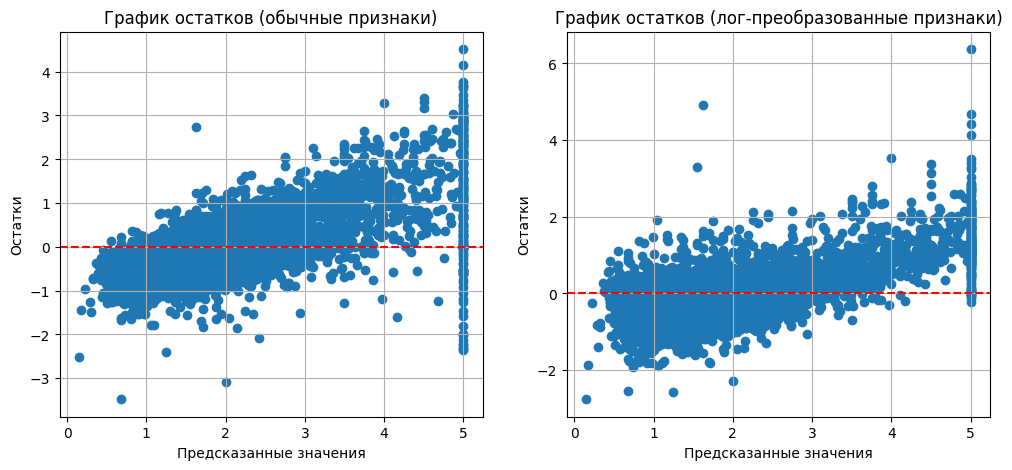

In [ ]:
# Визуализация остатков
residuals = y_test - y_pred
residuals_log = y_test - y_pred_log

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(y_test, residuals)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel("Предсказанные значения")
axes[0].set_ylabel("Остатки")
axes[0].set_title("График остатков (обычные признаки)")
axes[0].grid(True)

axes[1].scatter(y_test, residuals_log)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel("Предсказанные значения")
axes[1].set_ylabel("Остатки")
axes[1].set_title("График остатков (лог-преобразованные признаки)")
axes[1].grid(True)

plt.show()


***End your code***

## Задача 5: Применение регрессии к датасету CO2 emissions (32 балла)
Используя датасет **CO2 Emissions Canada** (файл 'co2_emissions_canada.csv'), выполните следующие задачи:
1. (4 балла) Загрузите датасет, выберите признаки: *Engine Size(L), Cylinders, Fuel Consumption Comb (L/100 km)*.
2. (2 балла) Разделите данные на обучающую и тестовую выборки $80\% / 20\%$.
3. (2 балла) Постройте модель множественной линейной регрессии для предсказания выбросов $CO_2$.
4. (6 балла) Оцените важность признаков, используя коэффициенты модели.
5. (6 балла) Рассчитайте метрики качества модели: MSE, $R^2$.
6. (6 балла) Визуализируйте фактические и предсказанные выбросы $CO_2$, а также остатки модели.
7. (6 балла) Сделайте выводы о качестве модели и значимости признаков (постройте график с 'plt.xlabel("Значимость коэффициента")' и 'plt.ylabel("Признаки")').

***Start your code***

In [ ]:
# Загружаем данные
import pandas as pd
url = r'https://raw.githubusercontent.com/terinkov/sorces/refs/heads/main/co2_emissions_canada.csv'
df = pd.read_csv(url)

In [ ]:
# Выбираем признаки
features = ["Engine Size(L)", "Cylinders", "Fuel Consumption Comb (L/100 km)"]
target = "CO2 Emissions(g/km)"
X = df[features]
y = df[target]


In [ ]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Оценка модели

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE для CO2 модели: {mse:.2f}")
print(f"Коэффициент детерминации R^2: {r2:.2f}")


MSE для CO2 модели: 421.92
Коэффициент детерминации R^2: 0.88


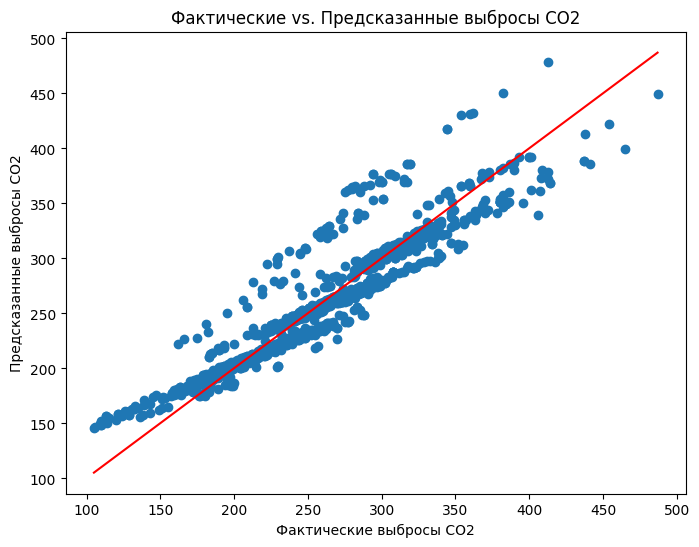

In [ ]:
# Визуализация результатов
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-')
plt.xlabel("Фактические выбросы CO2")
plt.ylabel("Предсказанные выбросы CO2")
plt.title("Фактические vs. Предсказанные выбросы CO2")
# plt.grid(True)
plt.show()


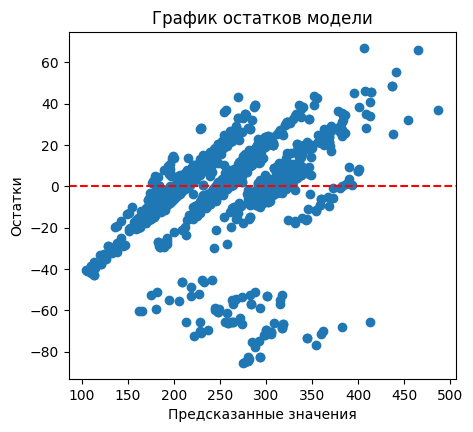

In [ ]:
# Визуализация остатков
residuals = y_test - y_pred
plt.figure(figsize=(5, 4.5))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков модели")
plt.show()


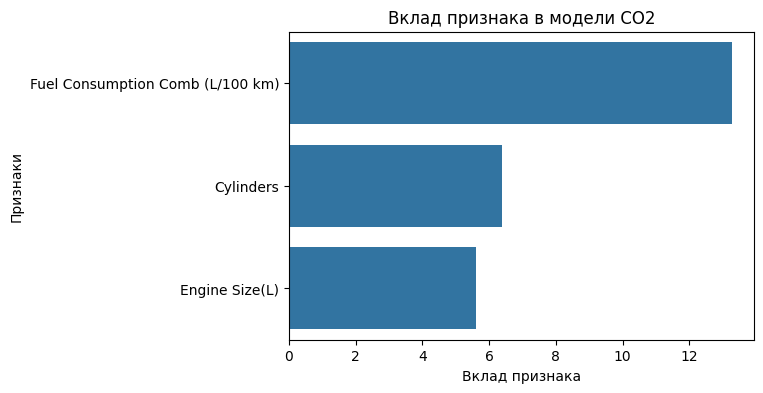

In [ ]:
# Анализ вклада признаков
coefficients = pd.DataFrame({"Feature": features, "Coefficient": model.coef_})
coefficients=coefficients.sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=coefficients["Coefficient"], y=coefficients["Feature"])

# Настройки графика
plt.xlabel("Вклад признака")
plt.ylabel("Признаки")
plt.title("Вклад признака в модели CO2")

# Показываем график
plt.show()

Вывод: Коэффициент детерминации равен 0.88, что означается, что модель хорошо объясняет изменчивость зависимой переменной. По анализу признаков: главный фактор выбросов — расход топлива. Остальные признаки также важны, но в меньшей степени. Остатки (по графику остатков) располагаются не совсем случайным образом, а имеют определенную структуру. Это может указывать на то, что модель не полностью адекватна. Наличие наклона (линии остатков) может свидетельствовать о том, что модель не учитывает некоторые важные переменные или что связь между переменными не является линейной. В идеале остатки должны быть распределены случайным образом вокруг нуля.




***End your code***